<br><br><br><br>
<h4><b>Data Analysis - Sales_Revenues Dataset</b></h4>
<br><br>

<pre>  
<b>1. Environment setup-used</b>
<br>
<b>2. Notebook Flow</b>
      2.1 File Read
      2.2 Pre-processing of Sales_Revenues dataset  
           a. Basic understanding of the data 
                - Sample data display
                - No of observations 
                - Datatype of the features
           b. Inspecing missing values/nan, if there is any
           c. Removal (or) replacing missing values/nan if necessary 
           d. Visual inspection of data
           e. Drescriptive statistics
<br>
<b>3. Assumptions & Takeaway</b>
<br>
</pre>

In [1]:
import numpy as np
import pandas as pd
import os

#----- Plotting & Visualization
import matplotlib.pyplot as plt
import seaborn as sb
bold_s = '\033[1m' #----- To print bold font
bold_e = '\033[0m'

#----- Pre-Processing
from utils import Preprocess, file_read

#----- Stats
from scipy.stats import norm

<br><br><br>
<h4><b>2.1 File Read</b></h4>
<pre>
File reading of Sales_Revenues
</pre>

In [5]:
Sales_Revenues = file_read('Sales_Revenues')

<br><br><br>
<h4><b>2.2 Pre-processing of 'Products_ActBalance' dataset  </b></h4>
<pre>
    a. Basic understanding of the data 
        - Sample data display
        - No of observations 
        - Datatype of the features
    b. Inspecing missing values/nan, if there is any
    c. Removal (or) replacing missing values/nan if necessary 
    d. Visual inspection of data
    e. Drescriptive statistics
</pre>

In [6]:
preprocess = Preprocess()

In [7]:
#----- a. Basic understanding of the data
preprocess.display_data(Sales_Revenues,'Sales_Revenues')




#----- Displaying top 5 rows of data-group:Sales_Revenues


,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1094,0,1,0,0.000000,5.138571,0.0000
1,1484,1,0,1,25.609107,0.000000,8.7225
2,20,0,1,0,0.000000,3.822500,0.0000
3,1193,0,0,0,0.000000,0.000000,0.0000
4,142,0,0,0,0.000000,0.000000,0.0000



#----- No.of observations
969

#----- features' datatypes and other info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Client      969 non-null    int64  
 1   Sale_MF     969 non-null    int64  
 2   Sale_CC     969 non-null    int64  
 3   Sale_CL     969 non-null    int64  
 4   Revenue_MF  969 non-null    float64
 5   Revenue_CC  969 non-null    float64
 6   Revenue_CL  969 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 53.1 KB

None


In [8]:
#----- b. Inspecting missing values
preprocess.inspect_missing_values(Sales_Revenues)




#----- Inspecting missing values
Client        0
Sale_MF       0
Sale_CC       0
Sale_CL       0
Revenue_MF    0
Revenue_CC    0
Revenue_CL    0
dtype: int64


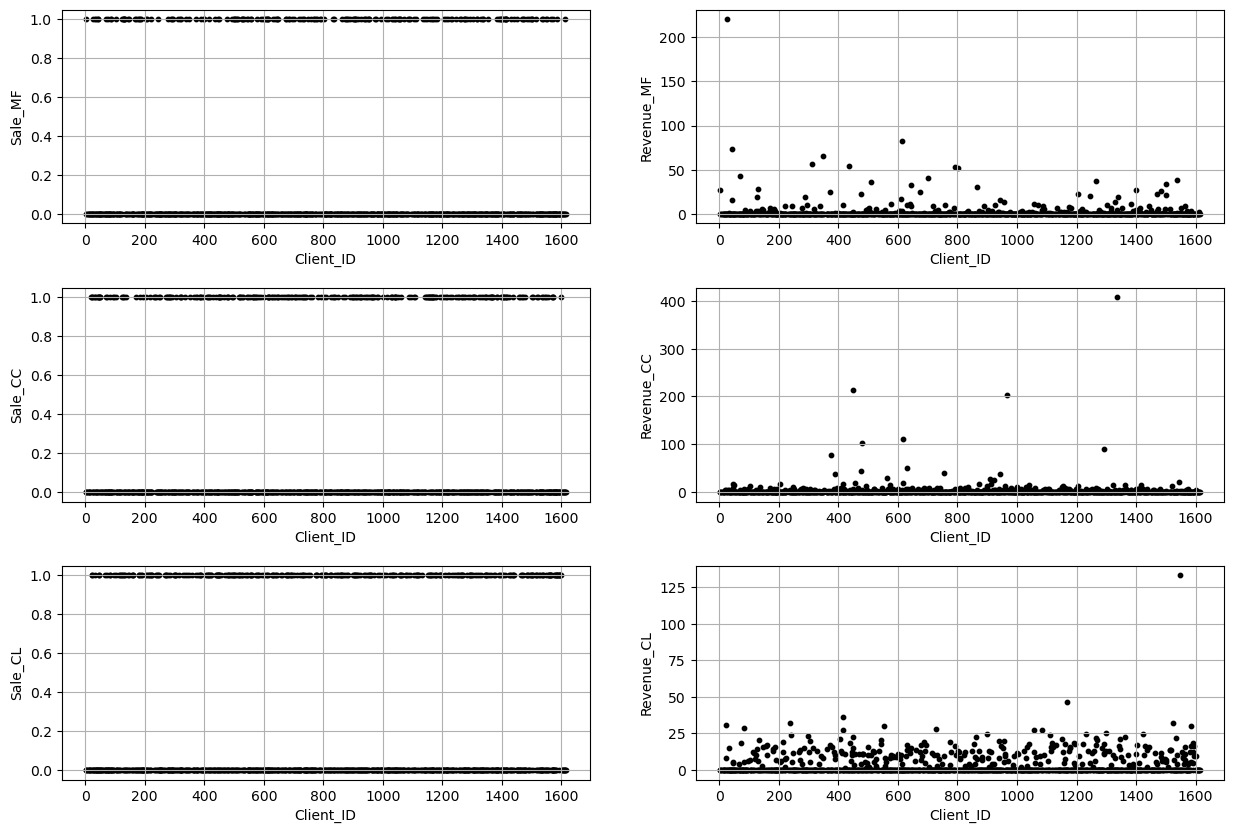

In [10]:
#----- d. Visual Inspection of the Soc_Dem

fig, axs = plt.subplots(3,2, figsize = (15,10))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

columns = list(Sales_Revenues.columns)

#------ Graphing scattered plot of client vs feature values
for i in range(0,3):
    for j in range(0,2):        
        feature = columns[(i+1) + (3*j)]
        axs[i,j].scatter( Sales_Revenues['Client'], Sales_Revenues[feature], color = 'black', s = 10)
        axs[i,j].set(xlabel = 'Client_ID' , ylabel = feature)
        axs[i,j].grid(True)    
        
plt.show()

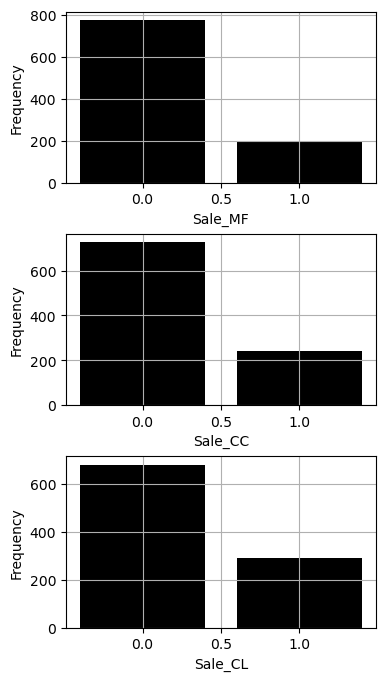

In [17]:
#----- d. Visual Inspection of the Soc_Dem

fig, axs = plt.subplots(3, figsize = (4,8))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

#------ Bar graph
for i in range(0,3):
    feature = columns[(i+1)]
    
    temp = Sales_Revenues[feature].value_counts()
    axs[i].bar(temp.index,temp, color = 'black')
    axs[i].set(xlabel = feature, ylabel = 'Frequency')
    axs[i].grid(True)    

plt.show()

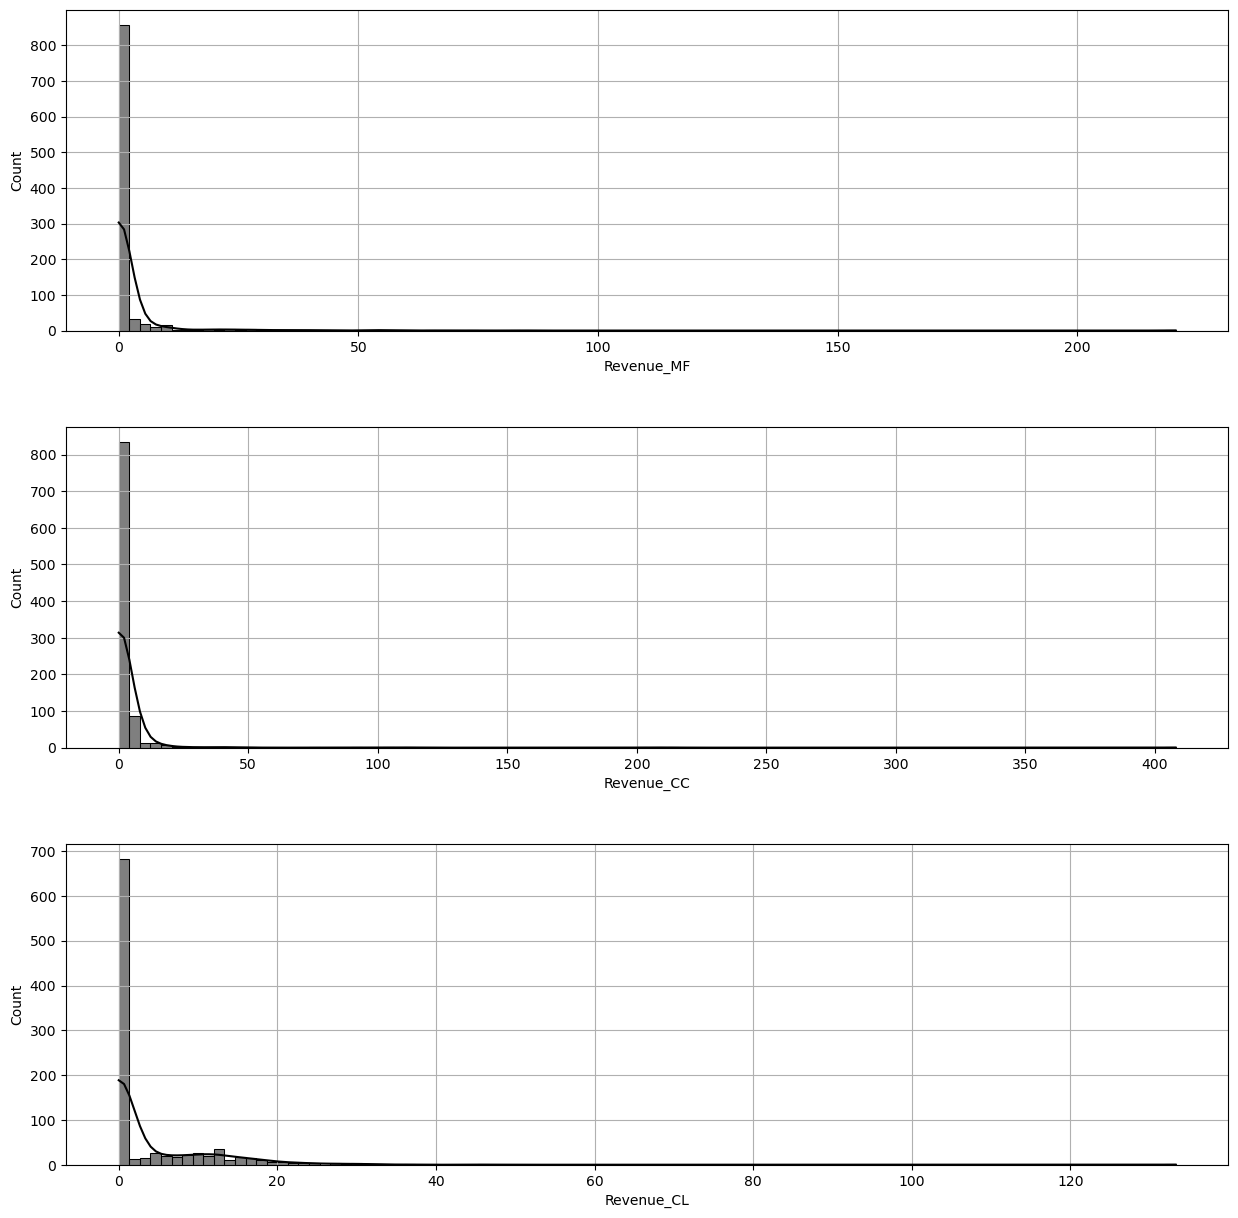

In [23]:
#----- d. Visual Inspection of the Soc_Dem

fig, axs = plt.subplots(3, figsize = (15,15))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(0,3):       
    feature = columns[i+4]
    sb.histplot(Sales_Revenues[feature],bins = 100, kde = True,ax = axs[i],color='black')
    axs[i].grid(True)
       
plt.show()

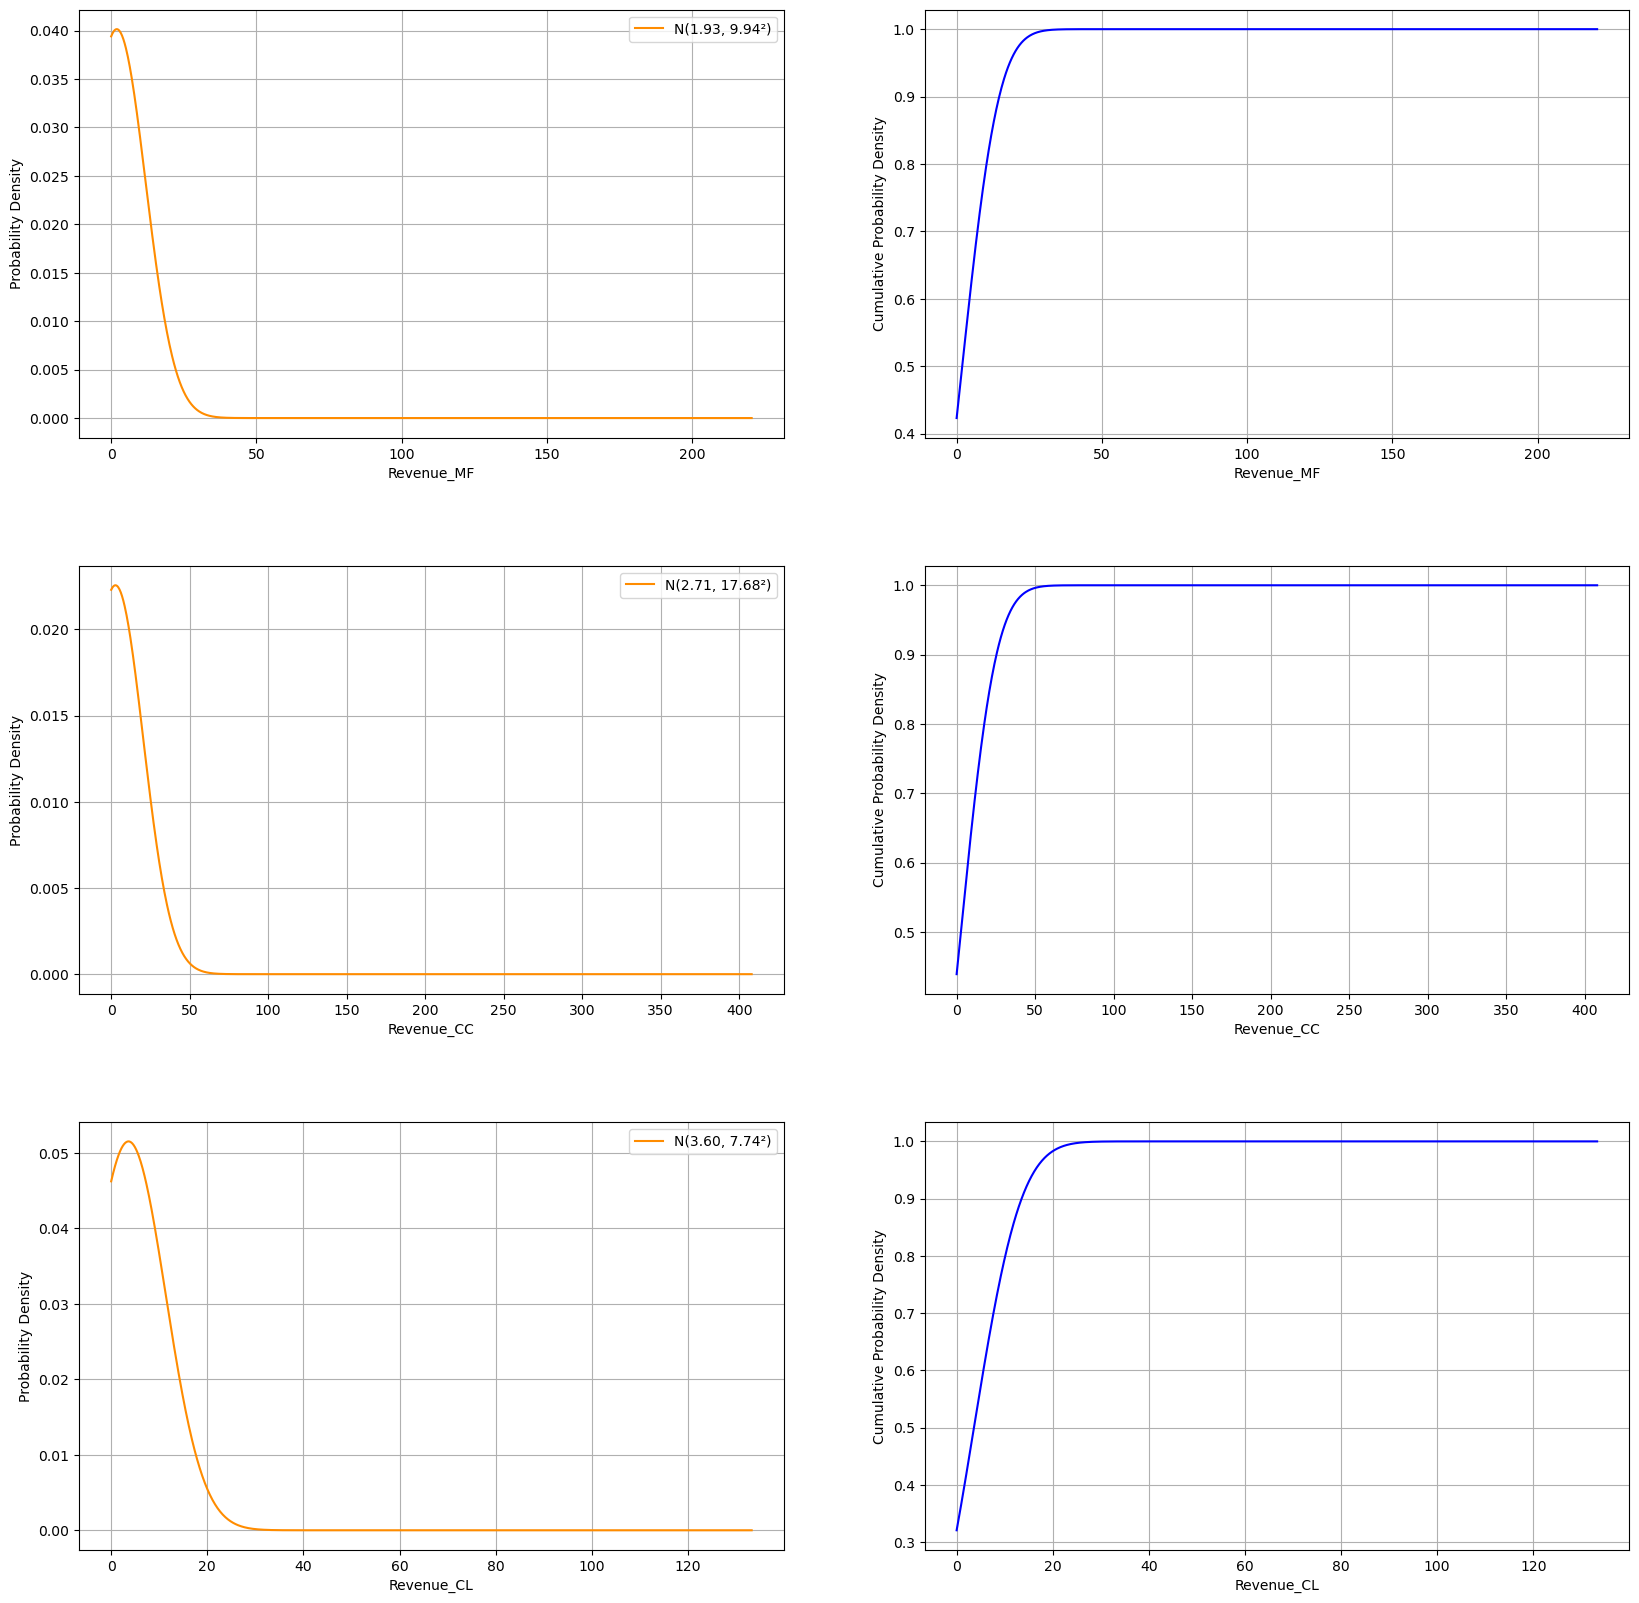

In [31]:
#----- d. Visual Inspection of the Soc_Dem
fig, axs = plt.subplots(3,2, figsize = (20,20))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(0,3):    
    feature = columns[i+4]
    feature_data = Sales_Revenues[feature]

    mean, std = norm.fit(feature_data)
    x = np.linspace(min(feature_data), max(feature_data), 1000)
    y = norm.pdf(x, mean,std)
        
    axs[i,0].plot(x, y, color='darkorange',label = f'N({mean:.2f}, {std:.2f}²)')
    axs[i,0].set(xlabel = feature, ylabel = 'Probability Density')
    axs[i,0].legend()
    axs[i,0].grid(True)

    cdf = norm.cdf(x, mean,std)
        
    axs[i,1].plot(x, cdf, color='blue')
    axs[i,1].set(xlabel = feature, ylabel = 'Cumulative Probability Density')
    axs[i,1].grid(True)
        
plt.show()

In [33]:
#----- e. Descriptive Statistics
preprocess.descriptive_stats(Products_ActBalance, 'Products_ActBalance', columns[4:7])


#----- Descriptive Stats of feature: Revenue_MF of data-group:Products_ActBalance
Mean:1.925015479876161 Std:9.943601381561399
Min_value :0.0 Max_value:220.4882142857143

#----- Descriptive Stats of feature: Revenue_CC of data-group:Products_ActBalance
Mean:2.712826551673301 Std:17.693432992464203
Min_value :0.0 Max_value:407.96250000000003

#----- Descriptive Stats of feature: Revenue_CL of data-group:Products_ActBalance
Mean:3.6042201090962704 Std:7.743618498547565
Min_value :0.0 Max_value:133.27535714285713
